***CH03. 평가***

- 머신러닝은 데이터 가공/변환, 모델 학습/예측, 그리고 평가(Evaluation)의 프로세스로 구성됩니다.
- 머신러닝 모델은 여러 가지 방법으로 예측 성능을 평가할 수 있습니다.
- 성능 평가 지표(Evaluation Metric)는 일반적으로 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉩니다.

분류의 성능 평가 지표
- 정확도(Accuracy)
- 오차행렬(Confusion Matrix)
- 정밀도(Precision)
- 재현율(Recall)
- F1스코어
- ROC AUC

분류는 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결과값만을 가지는 **이진분류**와 여러 개의 결정 클래스 값을 가지는 **멀티 분류**로 나뉠 수 있습니다.

#**01.정확도(Accuracy)**

**정확도(Accuracy) = 예측 결과가 동일한 데이터 건수/전체 예측 데이터 건수**

- 정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표입니다. 하지만 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않습니다.


In [ ]:
# 왜곡하는 예시
# 단순히 성별(Sex) 피처가 1이면 0, 그렇지 않고 0이면 1로 예측하는 매우 단순한 Classifier
# 사이킷런의 BaseEstimater를 상속받으면 Customized 형태의 Estimator를 개발자가 생성할 수 있습니다.
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # fit() 메서드는 아무것도 학습하지않음
  def fit(self,X,y=None):
    pass
  # predict() 메서드는 단순히 sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
  def predict(self,X):
    pred = np.zeros( (X.shape[0],1) )
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1
    return pred

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습/테스트 데이터 분할
titanic_df = pd.read_csv('train.csv')
# 전처리 부분은 생략함

X_titanic_df = titanic_df.drop('Survived',axis = 1)
y_titanic_df = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)
mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 :{0:4f}'.format(accuracy_score(y_test,mypredictions)))

Dummy Classifier의 정확도는 :0.385475


- 정확도를 평가 지표로 사용할 때는 매우 신중해야함.
- 특히 정확도는 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아닙니다.
- 예를 들어 100개의 데이터중에서 90개의 데이터 레이블이 0, 90개, 단 10개의 데이터 레이블이 1이라고 한다면 무조건 0으로 예측 결과를 반환하는 ML 모델의 경우라도 정확도가 90%가 됩니다.

사이킷런은 load_digits() API를 통해 MNIST 데이터 세트를 제공
- MNIST 데이터 세트는 레이블 값이 0~9 까지 있는 멀티 레이블 분류를 위한 것
- 이것을 데이터 레이블이 7인 것만 True, 나머지값은 False인 이진분류로 바꿔보겠습니다. 즉 전체 데이터의 10%만 True, 나머지는 90% 인 불균형한 데이터 세트로 변형


In [ ]:
# MNIST 예시
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self,X,y):
    pass
  # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0 값으로 만들어서 반환
  def predict(self,X):
    return np.zeros( (len(X),1), dtype=bool )

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True, 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train,X_test,y_train,y_test = train_test_split(digits.data, y, random_state = 11)

# 불균형한 레이블 분포도 확인
print('레이블 테스트 세트 크기 :',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 :{0:4f}'.format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 :0.900000


- 단순히 predict()의 결과를 np.zeros()로 모두 0값으로 반환함에도 불구하고 450개의 테스트 데이터 세트에 수행한 예측 정확도는 90%입니다. 단지 모든 것을 0으로 예측해도 정확도가 90%로 유수의 ML 알고리즘과 어깨를 겨룰 수 있다는 것은 말도 안되는 일이다.

- 이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서 성능 수치로 사용되서는 안된다.

- 정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 적용해햐 함
- 먼저 True/false, Positive/Negative의 4분면으로 구성되는 오차 행렬(Confusion Matrix)에 대해 설명

#**02. 오차 행렬(Confusion Matrix)**

- 이진 분류에서 성능 지표로 잘 활용되는 오차행렬(Confusion Matrix, 혼동행렬)은 학습된 분류 모델이 예측을 수행하면서 얼마나 햇갈리고(confused) 있는지도 함께 보여주는 지표입니다. 즉 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표입니다.

- 오차 행렬은 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타낸다. 4분면의 왼쪽, 오른쪽을 예측된 클래스 값 기준으로 Negative, Positive로 분류하고, 4분면의 위 아래를 실제 클래스 값 기준으로 Negative positive로 분류 하면 예측 클래스와 실제 클래스의 값 유형에 따라 결정되는 TN, FP FN TP 형태로 오차 행렬의 4분면을 채울 수 있다.

- TN FP FN TP 값을 다양하게 결합해 분류 모델 예측 성능의 오류가 어떠한 모습으로 발생하는지 알 수 있습니다.

TN FP FN TP 기호가 의미하는 것은 앞 문자 True/False는 예측값과 실제값이 같은가/틀린가를 의미하고, 뒤 문자 Negative/Positive는 예측 결과값이 부정(0)/긍정(1)을 의미함.

>> TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0

>> FP는 예측값을 Positive 값 1로 예측했고 실제값은 Negative 값 0

>> FN는 예측값을 Negative 값 0으로 예측했고 실제값은 Positive 값 1

>> TP는 예측값을 Positive 값 1로 예측했고 예측값은 Negative 값 1

- 사이킷런은 오차 행렬을 구하기 위해 confusion matrix() API를 제공합니다.
- 앞에서 다룬 MyFakeClassifier의 예측 성능 지표를 오차 행렬로 표현

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]])

- TP,FN,FP,TN 값은 Classifier 성능의 여러 면모를 판단할 수 있는 기반 정보를 제공합니다. 이 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(precision), 재현율(Recall)값을 알 수 있습니다.

- 정확도는 오차행렬에서 True에 해당하는 값인 TN과 TP에 좌우됩니다.
- **정확도 = 예측결과와 실제 값이 동일한 건수/ 전체 데이터 수 = (TN+TP)/(TN+FP+FN+TP)**

- 정확도 보다 더 선호되는 평가 지표인 정밀도(precision)와 재현율(Recall)에 대해 알아보자

#**03. 정밀도와 재현율**

- 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다.
- 정밀도 = TP/(FP+TP)
- 재현율 = TP/(FN+TP)

>>- 정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다.
- Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고도 불린다.

>>- 재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻함.
- 민감도, TPR(True Positive Rate)이라고도 불린다

- **재현율**이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

- **정밀도**가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

- ** 정밀도도 중요 평가 지표지만, 업무적인 특성을 고려하면 재현율이 상대적으로 더 중요한 지표이다.**

- 사이킷런은 정밀도 계산을 위해 precision_score()를, 재현율 계산을 위해 recall_score()를 API로 제공.

- confusion matrix,accuracy,precision,recall등의 평가를 한꺼번에 호출하는 get_clf_eval() 함수를 만들도록 하겠습니다.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def get_clf_eval(y_test,pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test,pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test,pred)
  print('오차행렬')
  print(confusion)
  print('정확도:{0:4f}, 정밀도:{1:4f}, 재현율:{2:4f}'.format(accuracy,precision,recall))

In [ ]:
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df

def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis = 1, inplace = True)
  return df

def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

titanic_df = pd.read_csv('train.csv')
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
y_titanic_df = titanic_df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size = 0.20, random_state = 11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도:0.849162, 정밀도:0.774194, 재현율:0.786885


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


- 정확도에 비해 재현율, 정밀도는 낮게 나왔다. 재현율 정밀도를 좀 더 강화할 방법은 무엇일까?

**정밀도/재현율 트레이드 오프**

- 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있습니다. 하지만 정밀도와 재현율은 **상호 보완적인 평가 지표**이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다.
이를 **정밀도/재현율 트레이드 오프(Trade-off)**라고 부른다.

- 일반적으로 이진분류에서는 임곗값을 0.5, 즉 50%로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정

- 사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공.
- predict_proba() 메서드는 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환
- predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스 값이 아닌 예측 확률 결과라는 점

각 열은 개별 클래스의 예측 확률이고, 이진 분류에서 첫 번째 컬럼은 0 Negative의 확률, 두번째는 1 Positive의 확률

In [ ]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print('pred_proba()의 결과 shape : {0}', format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 추출 :\n',pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합(concatenate)하여 예측 확률과 결과값을 확인
pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n',pred_proba_result[:3])

pred_proba()의 결과 shape : {0} (179, 2)
pred_proba array에서 앞 3개만 추출 :
 [[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.46191519 0.53808481 1.        ]
 [0.878675   0.121325   0.        ]
 [0.87716185 0.12283815 0.        ]]


In [ ]:
from sklearn.preprocessing import Binarizer

x = [[1,-1,2],[2,0,0],[0,1.1,1.2]]

# x의 개별 원소들이 thresehold 값 보다 같거나 작으면 0, 크면 1로 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


 - 입력된 X 데이터 세트에서 Binarizer의 threshold값이 1.1보다 같거나 작으면 0, 크면 1로 변환됨을 알 수 있다.
 - 앞 예제의 predict_proba() 메서드는 분류 결정 임곗값이 0.5로 지정한 Binarizer 클래스를 적용해 최종 예측값을 구하는 방식

In [ ]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

# predict_proba() 반환값이 두 번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도:0.849162, 정밀도:0.774194, 재현율:0.786885


- threshold 결정값을 0.5 -> 0.4 낮춤

In [ ]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.4

# predict_proba() 반환값이 두 번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[98 20]
 [10 51]]
정확도:0.832402, 정밀도:0.718310, 재현율:0.836066


- 임곗값을 낮추니 재현율 값이 올라가고 정밀도가 떨어졌습니다. why? : 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준, 확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기에 임곗값을 낮출수록 True값이 많아지게 됩니다.
- Positive 예측 값이 많아지면 상대적으로 재현율이 높아집니다. 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문

- 이번 예제는 임곗값을 0.4에서 0.6까지 0.05씩 증가시키며 평가 지표를 조사

In [ ]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
  # thresholds list객체 내의 값을 차례로 interation하면서 Evaluation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:',custom_predict)
    get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: [[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]

precision_recall_curve() 이용

In [ ]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 에측 확률을 precision_recall_curve 인자로 입력
precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 임곗값 배열의 shape:',thresholds.shape)

# 반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0,thresholds.shape[0],15)
print('샘플 추출을 위한 임곗값 배열의 index 10개 :', thr_index)
print('샘플용 10개의 임곗값 :',np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도,재현율 값
print('샘플 임계값별 정밀도:',np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:',np.round(recalls[thr_index],3))

반환된 분류 임곗값 배열의 shape: (143,)
샘플 추출을 위한 임곗값 배열의 index 10개 : [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값 : [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


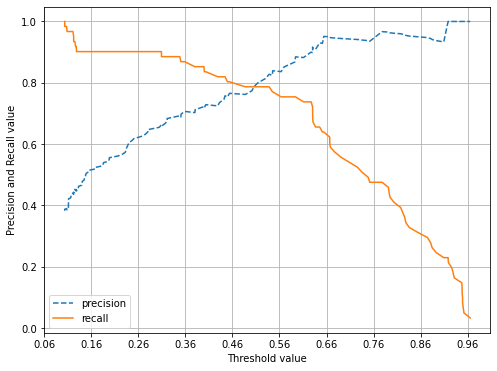

In [ ]:
# 정밀도, 재현율의 임곗값에 따른 값 변화를 곡선 형태의 크래프로 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
  precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_c1)

  # X축을 threshold 값으로 Y축을 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
  plt.figure(figsize = (8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary],linestyle = '--', label = 'precision')
  plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')

  # thresold 값 x축의 scale을 0.1단위로 변경
  start,end = plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  # x축,y축 label과 legend, grid 설정
  plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
  plt.legend();plt.grid()
  plt.show()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

#**04. F1 스코어**

- F1 스코어는 정밀도와 재현율을 결합한 지표.
- 공식은 생략

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred)
print('f1 스코어 :{0:4f}'.format(f1))

f1 스코어 :0.780488


In [ ]:
def get_clf_eval(y_test,pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test,pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test,pred)
  f1 = f1_score(y_test,pred)
  print('오차행렬\n')
  print(confusion)
  print('정확도:{0:4f}, 정밀도:{1:4f}, 재현율:{2:4f}, f1 스코어:{3:4f}'.format(accuracy,precision,recall,f1))

thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: [[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]

#**05. ROC 곡선과 AUC**

- ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표입니다.
- 일반적으로 의학 분야에서 많이 사용됨
- ROC 곡선은 X축인 FPR이 변할때 y축인 TPR이 어떻게 변하는지를 나타내는 곡선
- TPR은 True Positive Rate의 약자로, 재현율(민감도)을 나타냄
- 이에 대응하는 TNR은 특이성이라고 부른다.
- **FPR = FP/(FP+TN) = 1-TNR = 1-특이성**

- 사이킷런은 ROC곡선을 구하기위해 roc_curve() API를 제공.
- 입력 파라미터 : y_true, y_score
- 반환 값 : fpr, tpr, thresholds

In [ ]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test,pred_proba_class1)

thr_index = np.arange(1,thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index:',thr_index)
print('샘플 index로 추출한 임곗값:',np.round(thresholds[thr_index],3))
print('샘플 index로 추출한 FPR:',np.round(fpr[thr_index],3))
print('샘플 index로 추출한 TPR:',np.round(tpr[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값: [0.965 0.654 0.63  0.563 0.454 0.4   0.348 0.148 0.125 0.112 0.108]
샘플 index로 추출한 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 index로 추출한 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


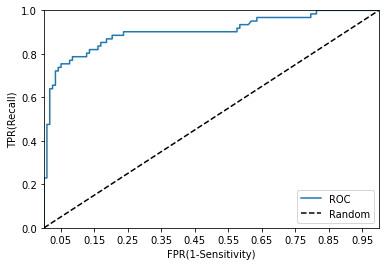

In [ ]:
def roc_curve_plot(y_test,pred_proba_c1):
  fpr, tpr, thresholds = roc_curve(y_test,pred_proba_c1)
  # ROC 곡선을 그래프 곡선으로 그림
  plt.plot(fpr,tpr,label='ROC')
  # 가운데 대각선 직선을 그림
  plt.plot([0,1],[0,1],'k--',label='Random')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  plt.xlim(0,1);plt.ylim(0,1)
  plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test,pred_proba[:,1])

- AUC값은 ROC곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치
- AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 큰 관건이다.
- 가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은 ROC AUC 성능 수치를 얻게 된다.
- 가운데 대각선 직선은 랜덤 수준의(동전 던지기 수준)이 진 분류 AUC값으로 0.5 입니다.

#**06. 피마 인디언 당뇨병 예측**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes = pd.read_csv('diabetes.csv')
print(diabetes['Outcome'].value_counts())
diabetes.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test,pred)

오차행렬

[[88 12]
 [23 31]]
정확도:0.772727, 정밀도:0.720930, 재현율:0.574074, f1 스코어:0.639175


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


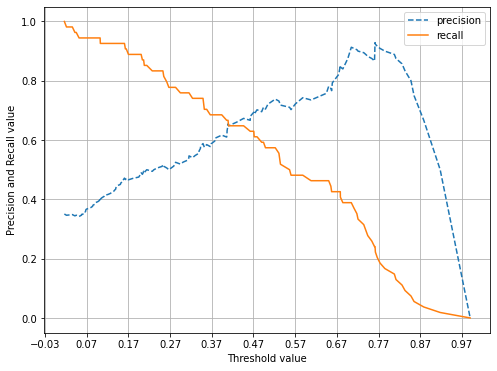

In [ ]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

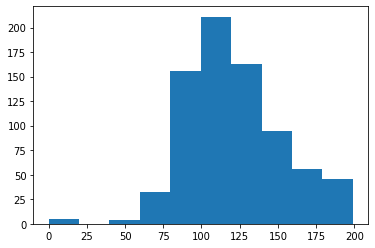

In [ ]:
plt.hist(diabetes['Glucose'],bins=10)

In [ ]:
# 0값을 검사할 피처 명 리스트
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes[diabetes[feature]==0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [ ]:
# zero_feature 리스트 내부에 저장된 개별 피처들에 대해서 0 값을 평균값으로 대체
mean_zero_features = diabetes[zero_features].mean()
diabetes[zero_features] = diabetes[zero_features].replace(0, mean_zero_features)

- 로지스틱 회귀의 경우 일반적으로 숫자 데이터에 스케일링을 적용하는 것이 좋음

In [ ]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

# standardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba  = lr_clf.predict_proba(X_test)

get_clf_eval(y_test,pred)

오차행렬

[[90 10]
 [21 33]]
정확도:0.798701, 정밀도:0.767442, 재현율:0.611111, f1 스코어:0.680412


In [ ]:
# 0.3 부터 0.5 까지 0.03 씩 변화
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]]
오차행렬

[[67 33]
 [11 43]]
정확도:0.714286, 정밀도:0.565789, 재현율:0.796296, f1 

- 임곗값이 0.48일때가 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 좋은 임겟값으로 보임


In [ ]:
# 임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test,pred_th_048)

오차행렬

[[88 12]
 [19 35]]
정확도:0.798701, 정밀도:0.744681, 재현율:0.648148, f1 스코어:0.693069
